In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm

from keras.models import load_model, Model


In [2]:
cd C:/Users/fjdur/Documents/utils/

C:\Users\fjdur\Documents\utils


In [3]:
import utils_guided_retraining as utils

2.5.0
keras
2.5.0


In [4]:
dataset = "intel"

In [5]:
x_test,y_test = utils.get_data(dataset,"Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data(dataset,"Train_and_adversary")

In [7]:
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data(dataset,'Test_adversarial') 

In [8]:

model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06/"
if(dataset == 'gtsrb'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/tf_model_25-06"
elif(dataset == 'intel'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10"
elif(dataset == 'mnist'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/models2"
elif(dataset == 'cifar'):
    model_dir = "C:/Users/fjdur/Documents/upc-july/models/model_02"


In [9]:
print(model_dir)
model_original = utils.My_model(dataset,True, model_dir)

C:/Users/fjdur/Documents/upc-july/models/intel_model_21_10
Model loaded correctly


## Loading models

In [10]:
data_dir = "D:/models/aug_22"

config = "C1"
config_lc = "c1"
num_models = 20

In [12]:
loading = True

models_lsa = []

if loading:
    for i in range(num_models):
        model_lsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_lsa_e1_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model(dataset,True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_0
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_1
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_2
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_3
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_4
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_5
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_6
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_7
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_8
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_9
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_10
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_11
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_lsa_e1_12
Model loaded correc

In [13]:
len(models_lsa)

20

In [14]:
loading = True

models_dsa = []

if loading:
    for i in range(num_models):
        #model_dsa_dir = "D:/models/gtsrb_models/C1/gtsrb_model_c1_sep_dsa_e2_"+str(i)
        model_dsa_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dsa_e1_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model(dataset,True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       

    

D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_0
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_1
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_2
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_3
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_4
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_5
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_6
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_7
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_8
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_9
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_10
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_11
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dsa_e1_12
Model loaded correc

In [15]:
loading = True

models_dg = []

if loading:
    for i in range(num_models):
        #model_dg_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_gn_e1_"+str(i)
        model_dg_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_dg_e1_"+str(i)
        
        print(model_dg_dir)
        model =utils.My_model(dataset,True,model_dg_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dg.append(model)
       
    

D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_0
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_1
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_2
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_3
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_4
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_5
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_6
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_7
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_8
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_9
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_10
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_11
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_dg_e1_12
Model loaded correctly
D:/models

In [16]:
loading = True

models_se = []

if loading:
    for i in range(num_models):
        
        model_se_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_se_e1_"+str(i)
        
        print(model_se_dir)
        model =utils.My_model(dataset,True,model_se_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_se.append(model)

D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_0
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_1
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_2
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_3
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_4
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_5
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_6
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_7
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_8
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_9
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_10
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_11
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_se_e1_12
Model loaded correctly
D:/models

In [17]:
loading = True

models_random = []

if loading:
    for i in range(num_models):
        #model_random_dir = "D:/models/aug_22/gtsrb/C1/gtsrb_model_c1_aug_random_e1_"+str(i)
        model_random_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_random_e1_"+str(i)
        
        print(model_random_dir)
        model =utils.My_model(dataset,True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       

D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_0
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_1
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_2
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_3
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_4
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_5
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_6
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_7
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_8
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_9
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_10
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_random_e1_11
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_

In [18]:
loading = True

models_nc = []

if loading:
    for i in range(num_models):
        #model_nc_dir = "D:/models/aug_22/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1"+str
        model_nc_dir = data_dir+"/"+dataset+"/C1/"+dataset+"_model_c1_aug_nc_e1_"+str(i)
        print(model_nc_dir)
        model =utils.My_model(dataset,True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)

D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_0
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_1
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_2
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_3
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_4
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_5
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_6
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_7
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_8
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_9
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_10
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_11
Model loaded correctly
D:/models/aug_22/intel/C1/intel_model_c1_aug_nc_e1_12
Model loaded correctly
D:/models

## Evaluating

In [19]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [20]:
evaluate_lsa = []
evaluate_dsa = []
evaluate_dg = []
evaluate_se = []
evaluate_nc = []
evaluate_random = []

evaluate_lsa.append([0,0,0,0])
evaluate_dsa.append([0,0,0,0])
evaluate_dg.append([0,0,0,0])
evaluate_se.append([0,0,0,0])
evaluate_nc.append([0,0,0,0])
evaluate_random.append([0,0,0,0])

In [21]:
# Metrics using adversarial test

#evaluate_lsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_dsa.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_nc.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
#evaluate_random.append(model_original.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for lsa")
for model in models_lsa:
    evaluate_lsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for dsa")
for model in models_dsa:
    evaluate_dsa.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for random")
for model in models_random:
    evaluate_random.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
print("Evaluating for nc")
for model in models_nc:
    evaluate_nc.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))

Evaluating for lsa
188/188 [==============================] - 10s 37ms/step - loss: 1.0781 - accuracy: 0.6292 - precision_19: 0.5994 - recall_19: 0.4840 2s - loss: 1.1483 - accuracy: 0.6178 -
Evaluating for dsa
188/188 [==============================] - 10s 36ms/step - loss: 0.5808 - accuracy: 0.8119 - precision_39: 0.8488 - recall_39: 0.8037 0s - loss: 0.5678 - accuracy: 0.8174 - precision_39: 0.8503 - recall
Evaluating for random
188/188 [==============================] - 10s 35ms/step - loss: 0.6114 - accuracy: 0.7779 - precision_99: 0.7988 - recall_99: 0.7310 1s - loss: 0.6020 - accuracy: 0.7806 - precision_99: 0.79
Evaluating for nc
188/188 [==============================] - 10s 37ms/step - loss: 0.5964 - accuracy: 0.7857 - precision_119: 0.8531 - recall_119: 0.7552 3s - loss: 0.5550 - accuracy: 0.8


In [22]:
print("Evaluating for dg")
for model in models_dg:
    evaluate_dg.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))
    
print("Evaluating for se")
for model in models_se:
    evaluate_se.append(model.evaluate(x_test_and_adversary,y_test_and_adversary))


Evaluating for dg
188/188 [==============================] - 10s 37ms/step - loss: 0.6259 - accuracy: 0.7696 - precision_59: 0.7880 - recall_59: 0.7030
Evaluating for se
188/188 [==============================] - 10s 38ms/step - loss: 0.6905 - accuracy: 0.7514 - precision_79: 0.7479 - recall_79: 0.6690


In [23]:
len(evaluate_dg)

21

In [24]:
len(evaluate_nc)

21

In [25]:
import pandas as pd

df_evaluate_lsa = pd.DataFrame(np.array(evaluate_lsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa = pd.DataFrame(np.array(evaluate_dsa),columns=["loss","accuracy","precision","recall"])
df_evaluate_dg = pd.DataFrame(np.array(evaluate_dg),columns=["loss","accuracy","precision","recall"])
df_evaluate_se = pd.DataFrame(np.array(evaluate_se),columns=["loss","accuracy","precision","recall"])

df_evaluate_random = pd.DataFrame(np.array(evaluate_random),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc = pd.DataFrame(np.array(evaluate_nc),columns=["loss","accuracy","precision","recall"])


In [11]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config_lc

In [12]:
import pandas as pd
loading_csv = True
if(loading_csv):
    
    df_evaluate_lsa = pd.read_csv(save_dir+"/lsa_"+config_lc)
    df_evaluate_dsa = pd.read_csv(save_dir+"/dsa_"+config_lc)
    df_evaluate_dg = pd.read_csv(save_dir+"/dg_"+config_lc)
    df_evaluate_se = pd.read_csv(save_dir+"/se_"+config_lc)
    df_evaluate_random = pd.read_csv(save_dir+"/random_"+config_lc)
    df_evaluate_nc = pd.read_csv(save_dir+"/nc_"+config_lc)
    

In [29]:
dataset

'intel'

In [28]:
if(not loading_csv):
    df_evaluate_lsa.to_csv(save_dir+"/lsa_"+config_lc,index=False)
    df_evaluate_dsa.to_csv(save_dir+"/dsa_"+config_lc,index=False)
    df_evaluate_dg.to_csv(save_dir+"/dg_"+config_lc,index=False)
    df_evaluate_se.to_csv(save_dir+"/se_"+config_lc,index=False)
    df_evaluate_random.to_csv(save_dir+"/random_"+config_lc,index=False)
    df_evaluate_nc.to_csv(save_dir+"/nc_"+config_lc,index=False)

In [13]:

metric ="accuracy"
accuracy_lsa_3 = np.array(df_evaluate_lsa[metric])
accuracy_dsa_3 = np.array(df_evaluate_dsa[metric])
accuracy_dg_3 = np.array(df_evaluate_dg[metric])
accuracy_se_3 = np.array(df_evaluate_se[metric])

accuracy_nc_3 =np.array(df_evaluate_nc[metric])
accuracy_random_3 = np.array(df_evaluate_random[metric])


In [14]:
n_data_points = 700

In [15]:
len(accuracy_dsa_3)

21

In [16]:
if(len(accuracy_lsa_3)>21):
    n_inputs = [n_data_points*i for i in range(num_models+1)]
else:
    n_inputs = [n_data_points*i for i in range(num_models)]
    
n_inputs.append(len(x_train_and_adversary))
print(len(n_inputs))
n_inputs

21


[0,
 700,
 1400,
 2100,
 2800,
 3500,
 4200,
 4900,
 5600,
 6300,
 7000,
 7700,
 8400,
 9100,
 9800,
 10500,
 11200,
 11900,
 12600,
 13300,
 14224]

In [17]:
print(len(df_evaluate_lsa))
print(len(n_inputs))

21
21


In [18]:
save_dir = "D:/aug_graphs/"+dataset+"/"+config

In [19]:
linestyles = ['solid','dotted','dashed','dashed','dashdot','dashdot']
colors =['b','g','r','c','m','k']

12600 0.7361666560173035
14224 0.7528333067893982
12600 0.7555000185966492
11900 0.750166654586792
13300 0.7490000128746033
12600 0.7483333349227905


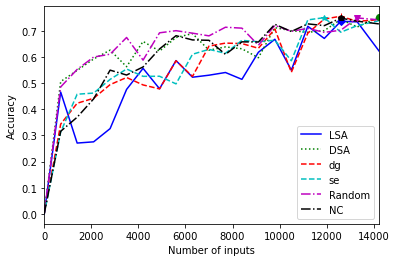

In [21]:
#adversarial jsma test set
#configuration 3
"""
6) Incremental guided retraining starting from the original model using only the new adversarial inputs.
Incremental training, starting with the previous trained model. Using at each iteration a subset of the new inputs.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.plot(n_inputs,accuracy_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_dg_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_se_3,colors[3],linestyle=linestyles[3])
plt.plot(n_inputs,accuracy_random_3,colors[4],linestyle=linestyles[4])
plt.plot(n_inputs,accuracy_nc_3,colors[5],linestyle=linestyles[5])


legend_elements = [Line2D([0], [0], color=colors[0], label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color=colors[1], label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color=colors[2], label='dg',ls = linestyles[2]),
                   Line2D([0], [0], color=colors[3], label='se',ls = linestyles[3]),
                   Line2D([0], [0], color=colors[4], label='Random',ls = linestyles[4]),
                   Line2D([0], [0], color=colors[5], label='NC',ls = linestyles[5])]



plt.legend(handles=legend_elements)#
#plt.title("Accuracy")

print(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max())
print(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max())
print(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max())
print(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max())
print(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max())
print(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_lsa_3)],accuracy_lsa_3.max(),'-bD',)
plt.plot(n_inputs[np.argmax(accuracy_dsa_3)],accuracy_dsa_3.max(),'-go')
plt.plot(n_inputs[np.argmax(accuracy_dg_3)],accuracy_dg_3.max(),'-r+')
plt.plot(n_inputs[np.argmax(accuracy_se_3)],accuracy_se_3.max(),'-c*')
plt.plot(n_inputs[np.argmax(accuracy_random_3)],accuracy_random_3.max(),'-mv')
plt.plot(n_inputs[np.argmax(accuracy_nc_3)],accuracy_nc_3.max(),'-kp')

plt.xlabel('Number of inputs')
plt.ylabel('Accuracy')
plt.xlim([0, len(x_train_and_adversary)])
#plt.ylim([0, 1])

plt.savefig(save_dir+"/"+dataset+"_"+config_lc+"_"+"accuracy" + ".svg")

plt.show()